# 자살 고위험군 예측

데이터 출처: 국민 건강영양조사

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("./suicide_data.csv")
df

,ID,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,A739211515,1,2,3,20,2,3,1,10,1,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2,3
1,A739211516,1,1,3,20,2,3,1,10,1,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2,3
2,A739211517,1,2,3,20,2,3,3,20,1,...,136.681,272.175,19.292,266.870,13.276,2265.539,2073.714,105.935,2,3
3,A739219614,1,1,4,20,1,3,1,20,1,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2,3
4,A739219615,1,2,4,20,1,3,1,20,1,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,P702300217,2,1,4,10,1,2,88,30,2,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3,1
7376,P702312314,2,2,2,20,1,2,3,10,2,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1,3
7377,P702322414,2,1,1,20,1,2,3,10,2,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2,3
7378,P702330414,2,1,1,10,1,2,2,30,2,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2,1


## 데이터 살펴보기 (결측률)

In [3]:
# 모름 또는 무응답으로 표기된 데이터를 결측값으로 대체합니다.

df = df.replace({'cfam':8, 'cfam':np.nan})
df = df.replace({'cfam':9, 'cfam':np.nan})
df = df.replace({'BD1_11':8, 'BD1_11':np.nan})
df = df.replace({'BD1_11':9, 'BD1_11':np.nan})
df = df.replace({'BE8_1':88, 'BE8_1':np.nan})
df = df.replace({'BE8_1':99, 'BE8_1':np.nan})

In [4]:
# 데이터 유형이 다른 속성들을 전부 numeric 속성으로 변환하여 결측을 찾습니다.

Counter(df.dtypes)

Counter({dtype('O'): 63, dtype('int64'): 10, dtype('float64'): 16})

In [5]:
df = df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [6]:
# 변환 후 확인

Counter(df.dtypes)

Counter({dtype('int64'): 10, dtype('float64'): 78})

In [7]:
#df.isnull().sum()

In [8]:
# null 값이 있는 feature와 결측의 개수 출력하는 함수 

def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i])
            null_col.append(null.index[i])

In [9]:
null_check(df)

mh_stress 1445
L_OUT_FQ 750
mh_suicide 1445
BE8_1 476
LW_mt 3608
LW_oc 3608
HE_HP 2176
HE_anem 1555
O_chew_d 1976
L_BR_FQ 750
L_LN_FQ 750
L_DN_FQ 750
DI2_pr 476
DI3_pr 476
DI4_pr 921
DI5_pr 476
DI6_pr 476
DM1_pr 924
DM2_pr 476
DM3_pr 476
DM4_pr 476
D_8_2 476
D_8_4 476
DJ4_pr 476
DE1_pr 476
DE2_pr 476
DC1_pr 476
DC2_pr 476
DC3_pr 476
DC4_pr 476
DC5_pr 476
DC6_pr 476
DC7_pr 476
DF2_pr 476
DL1_pr 476
DJ8_pr 476
DH2_pr 476
DH3_pr 476
DN1_pr 476
DK8_pr 476
DK9_pr 476
DK4_pr 476
LQ4_00 476
LQ1_sb 476
LQ_1EQL 476
LQ_2EQL 476
LQ_3EQL 476
LQ_4EQL 476
LQ_5EQL 476
educ 476
EC1_1 476
BO1 476
BO1_1 476
BO2_1 476
BD1_11 476
incm 52
edu 968
occp 2025
HE_wt 409
HE_wc 413
HE_BMI 421
N_EN 752
N_WATER 752
N_PROT 752
N_FAT 752
N_SFA 752
N_MUFA 752
N_PUFA 752
N_CHOL 752
N_CHO 752
N_TDF 752
N_CA 752
N_FE 752
N_NA 752
N_K 752
N_VITC 752
LF_SAFE 427
LF_S2 427


#### y_label에 해당하는 'mh_scicide' 변수 결측의 경우, 임의로 채울 수 없는 부분이므로 결측을 포함하는 행을 삭제합니다.

In [10]:
df1 = df.dropna(subset=['mh_suicide'])

In [11]:
df1

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,...,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2.0,1.0


In [12]:
# 다시 결측 확인 
null_check(df1)

mh_stress 1
L_OUT_FQ 643
LW_mt 2640
LW_oc 2640
HE_HP 845
HE_anem 411
O_chew_d 531
L_BR_FQ 643
L_LN_FQ 643
L_DN_FQ 643
DI4_pr 365
DM1_pr 365
incm 36
edu 398
occp 652
HE_wt 5
HE_wc 7
HE_BMI 9
N_EN 645
N_WATER 645
N_PROT 645
N_FAT 645
N_SFA 645
N_MUFA 645
N_PUFA 645
N_CHOL 645
N_CHO 645
N_TDF 645
N_CA 645
N_FE 645
N_NA 645
N_K 645
N_VITC 645
LF_SAFE 354
LF_S2 354


#### 결측률이 10%를 훨씬 뛰어넘는 변수 LW_mt, LW_oc 삭제 

In [13]:
df2 = df1.drop(['LW_mt','LW_oc'],axis='columns',inplace=False)

In [14]:
df2

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,...,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2.0,1.0


In [15]:
df2.describe()

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5934.000000,...,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5581.000000,5581.000000
mean,1.507161,1.555181,3.057793,19.222578,1.829486,1.844819,21.952485,18.731424,1.303454,0.271149,...,251.426087,313.905312,24.444346,491.780140,17.272302,3845.975069,3032.421206,105.044051,1.571045,2.935316
std,0.499991,0.496988,1.251300,3.451161,0.655978,0.845504,36.845830,11.693536,0.815100,0.444590,...,282.460174,133.375861,14.003415,314.219462,11.920659,3404.168789,1684.164395,120.842697,0.627489,0.276839
min,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,0.137000,7.173000,0.210000,5.401000,0.008000,2.868000,16.499000,-0.121000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,20.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,69.861750,223.391750,14.915000,284.223750,10.412000,2114.857500,1935.060000,30.028750,1.000000,3.000000
50%,2.000000,2.000000,3.000000,20.000000,2.000000,2.000000,1.000000,20.000000,1.000000,0.000000,...,175.125000,295.344500,21.596500,426.221500,14.894000,3278.272500,2710.713500,62.349000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,20.000000,2.000000,2.000000,4.000000,20.000000,1.000000,1.000000,...,339.371250,383.326750,31.051500,616.074250,21.226250,4885.563250,3743.763750,136.316750,2.000000,3.000000
max,2.000000,2.000000,6.000000,99.000000,9.000000,5.000000,88.000000,99.000000,9.000000,1.000000,...,7014.693000,1917.925000,158.909000,4026.348000,287.583000,170392.575000,26645.021000,1947.548000,4.000000,4.000000


In [16]:
Counter(df2['mh_suicide'])

Counter({0.0: 5611, 1.0: 324})

### 데이터 전처리

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [18]:
def pipeline(df, nums, cats):
    
    num_inputer = SimpleImputer(strategy='median')
    num_pipeline=Pipeline([
        ("select_numeric",DataFrameSelector(nums)),
        ("impute", num_inputer),
        ("scaler", StandardScaler())])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_pipeline = Pipeline([
        ("select_cat",DataFrameSelector(cats)),
        ("impute", cat_imputer)])
        #("encoder", OneHotEncoder())])
    
    preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    
    X=preprocess_pipeline.fit_transform(df)
    
    return X

In [19]:
nums = ['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']
cats = ['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

In [20]:
X_data = pipeline(df2,nums,cats)

# 범주형 속성을 원-핫 인코딩을 실행하면서 희소행렬 형태로 output이 출력됩니다.

In [21]:
print(X_data[0])

[ 1.33461886  1.19595444  0.9107949  -0.55769414 -0.89474376 -1.14094498
 -1.1124932  -0.19056819 -0.31768139 -0.06876745  0.77560927  0.94687247
  0.64277695  0.75473869 -0.08301399 -0.77714016 -0.84367245 -0.05026585
 -0.67468949 -0.51783973 -0.28655553 -0.59851344  0.65391279  0.22622831
  1.          2.          3.         20.          2.          3.
  1.         10.          1.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          2.          2.          1.
  1.          1.          1.          1.          6.          2.
  3.          1.          2.          4.          0.          5.
  2.          0.          0.          4.          1.          1.        ]


In [22]:
y_label = df2['mh_suicide']

#### 데이터 나누기

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, stratify=y_label, test_size=0.3, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [25]:
print('Train data shape: {0}'.format(X_train.shape))
print('Test data shape: {0}'.format(X_test.shape))

print('Train data label => %s' %Counter(y_train))
print('Test data label => %s' %Counter(y_test))

Train data shape: (4154, 84)
Test data shape: (1781, 84)
Train data label => Counter({0.0: 3927, 1.0: 227})
Test data label => Counter({0.0: 1684, 1.0: 97})


#### SMOTE로 데이터 불균형 해결

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(X_train,y_train)

In [27]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4154, 84) (4154,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7854, 84) (7854,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    3927
0.0    3927
dtype: int64


## 딥러닝 모델

In [28]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [108]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = models.Sequential()
model.add(Dense(128, input_dim = 84, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#w_mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [110]:
# class_weight = {0.0: 0.06, 1.0: 0.94}

history = model.fit(X_train_over,y_train_over,epochs=30,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 1.2808 - accuracy: 0.5171 - val_loss: 1.3516 - val_accuracy: 0.1185
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7820 - accuracy: 0.5593 - val_loss: 0.9629 - val_accuracy: 0.2577
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.5977 - val_loss: 1.0970 - val_accuracy: 0.3841
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.6105 - val_loss: 1.4197 - val_accuracy: 0.1611
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6332 - val_loss: 1.1757 - val_accuracy: 0.2319
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6443 - val_loss: 1.0620 - val_accuracy: 0.2431
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6692 - val_loss: 1.2306 - val_accuracy: 0.2948
Epoch 8/30
16/16 [==

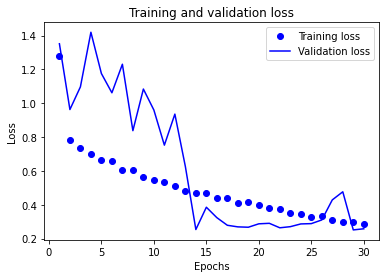

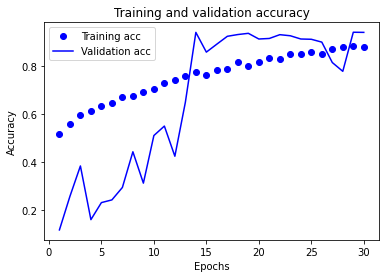

In [111]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [93]:
# 노드수 줄인 모델
smaller = models.Sequential()
smaller.add(Dense(100, input_dim = 84, activation='relu'))
smaller.add(Dense(100, activation='relu'))
smaller.add(Dense(1, activation='sigmoid'))

smaller.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [94]:
#class_weight = {0.0: 0.06, 1.0: 0.94}
smaller_hist = smaller.fit(X_train_over,y_train_over,epochs=30,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 1.1002 - accuracy: 0.5328 - val_loss: 1.1861 - val_accuracy: 0.1662
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7744 - accuracy: 0.5642 - val_loss: 0.9755 - val_accuracy: 0.2555
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7334 - accuracy: 0.5879 - val_loss: 0.9179 - val_accuracy: 0.4217
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.6057 - val_loss: 1.4812 - val_accuracy: 0.1207
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6269 - val_loss: 0.9507 - val_accuracy: 0.3526
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6360 - val_loss: 1.2037 - val_accuracy: 0.1965
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.6923 - val_loss: 1.4944 - val_accuracy: 0.1684
Epoch 8/30
16/16 [==

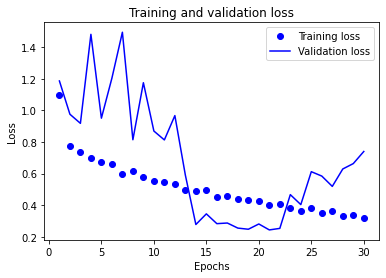

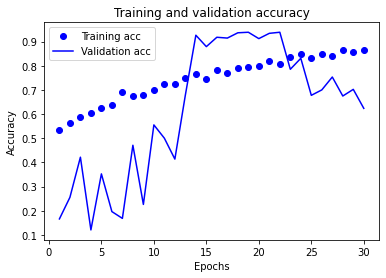

In [95]:
loss = smaller_hist.history['loss']
val_loss = smaller_hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = smaller_hist.history['accuracy']
val_acc = smaller_hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

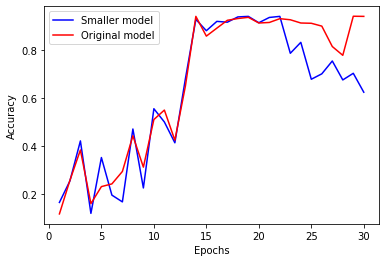

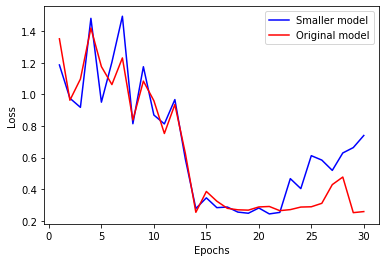

In [112]:
hist_dict = history.history
smaller_dict = smaller_hist.history

val_acc = hist_dict['val_accuracy']
val_loss = hist_dict['val_loss']
smaller_val_acc = smaller_dict['val_accuracy']
smaller_val_loss = smaller_dict['val_loss']

epochs = range(1, len(val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_acc, 'b', label='Smaller model')
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_loss, 'b', label='Smaller model')
plt.plot(epochs, val_loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

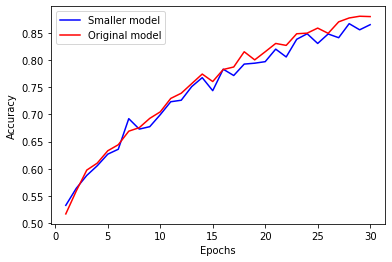

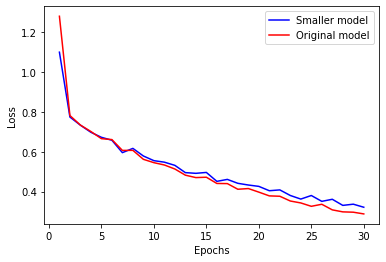

In [113]:
acc = hist_dict['accuracy']
loss = hist_dict['loss']
smaller_acc = smaller_dict['accuracy']
smaller_loss = smaller_dict['loss']

epochs = range(1, len(acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_acc, 'b', label='Smaller model')
plt.plot(epochs, acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_loss, 'b', label='Smaller model')
plt.plot(epochs, loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [154]:
# Bigger

bigger = models.Sequential()
bigger.add(Dense(250, input_dim = 84, activation='relu'))
bigger.add(Dense(250, activation='relu'))
bigger.add(Dense(1, activation='sigmoid'))

bigger.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [155]:
#class_weight = {0.0: 0.06, 1.0: 0.94}

bigger = bigger.fit(X_train_over,y_train_over,epochs=30,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 1.8359 - accuracy: 0.5098 - val_loss: 1.6260 - val_accuracy: 0.0780
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.9028 - accuracy: 0.5428 - val_loss: 1.0165 - val_accuracy: 0.2212
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7762 - accuracy: 0.5817 - val_loss: 1.1652 - val_accuracy: 0.3178
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.6006 - val_loss: 1.4753 - val_accuracy: 0.1252
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6296 - val_loss: 0.9253 - val_accuracy: 0.3981
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6436 - val_loss: 1.0077 - val_accuracy: 0.2414
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.6765 - val_loss: 0.9395 - val_accuracy: 0.3784
Epoch 8/30
16/16 [=

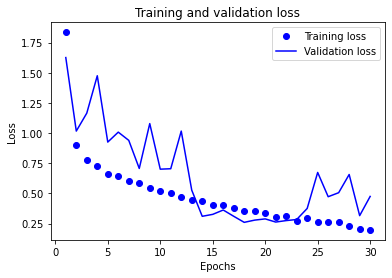

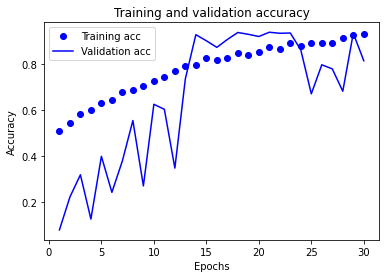

In [156]:
loss = bigger.history['loss']
val_loss = bigger.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = bigger.history['accuracy']
val_acc = bigger.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

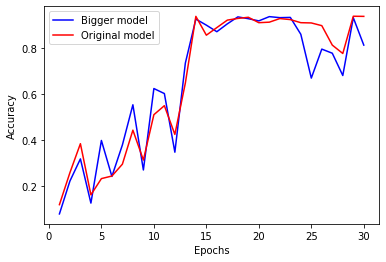

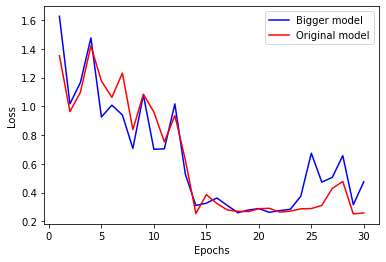

In [161]:
hist_dict = history.history
bigger_dict = bigger.history

val_acc = hist_dict['val_accuracy']
val_loss = hist_dict['val_loss']
bigger_val_acc = bigger_dict['val_accuracy']
bigger_val_loss = bigger_dict['val_loss']

epochs = range(1, len(val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, bigger_val_acc, 'b', label='Bigger model')
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, bigger_val_loss, 'b', label='Bigger model')
plt.plot(epochs, val_loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

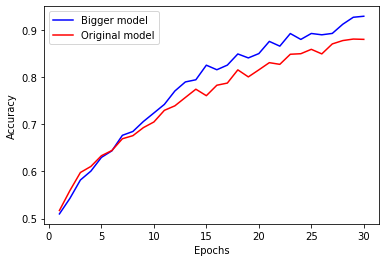

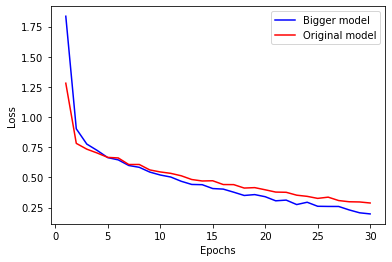

In [158]:
acc = hist_dict['accuracy']
loss = hist_dict['loss']
ms_acc = ms_dict['accuracy']
ms_loss = ms_dict['loss']

epochs = range(1, len(acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, ms_acc, 'b', label='Bigger model')
plt.plot(epochs, acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, ms_loss, 'b', label='Bigger model')
plt.plot(epochs, loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Dropout layer 추가

In [218]:
dpt_model = models.Sequential()
dpt_model.add(Dense(128, activation='relu', input_dim=84))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(128, activation='relu'))
dpt_model.add(Dropout(0.2))
dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [219]:
#class_weight = {0.0: 0.06, 1.0: 0.94}

dpt_model_hist = dpt_model.fit(X_train_over,y_train_over,epochs=30,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 1.6501 - accuracy: 0.5168 - val_loss: 1.1263 - val_accuracy: 0.2734
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.9999 - accuracy: 0.5402 - val_loss: 0.6795 - val_accuracy: 0.6081
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.8134 - accuracy: 0.5797 - val_loss: 0.8419 - val_accuracy: 0.4789
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.7403 - accuracy: 0.5991 - val_loss: 0.7861 - val_accuracy: 0.4424
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.6171 - val_loss: 0.7466 - val_accuracy: 0.5469
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6423 - val_loss: 0.6644 - val_accuracy: 0.6098
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.6481 - val_loss: 0.7847 - val_accuracy: 0.4688
Epoch 8/30
16/16 [=

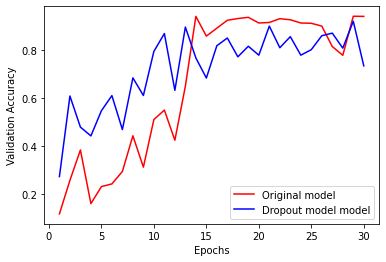

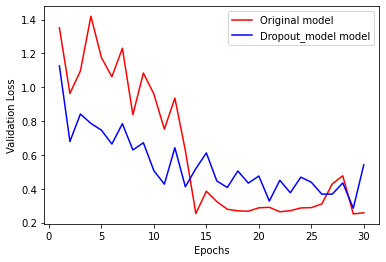

In [220]:
dpt_model_dict = dpt_model_hist.history

dpt_model_val_acc = dpt_model_dict['val_accuracy']
dpt_model_val_loss = dpt_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'b', label='Dropout model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, val_loss, 'r', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'b', label='Dropout_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

dropout 적용 모델이 더 나음 - dpt model

In [234]:
# dropout model에 층 쌓아보기
layer_model = models.Sequential()
layer_model.add(Dense(128, input_dim = 84, activation='relu'))
layer_model.add(Dropout(0.2))
layer_model.add(Dense(128, activation='relu'))
layer_model.add(Dropout(0.5))
layer_model.add(Dense(128, activation='relu'))
layer_model.add(Dense(1, activation='sigmoid'))

layer_model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [235]:
#class_weight = {0.0: 0.06, 1.0: 0.94}

layer_model_hist = layer_model.fit(X_train_over,y_train_over,epochs=30,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/30
16/16 [==============================] - 0s 11ms/step - loss: 1.2004 - accuracy: 0.5215 - val_loss: 0.9225 - val_accuracy: 0.1168
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 0.7791 - accuracy: 0.5199 - val_loss: 0.6331 - val_accuracy: 0.5042
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.7280 - accuracy: 0.5345 - val_loss: 0.7153 - val_accuracy: 0.5924
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.5583 - val_loss: 0.7810 - val_accuracy: 0.3633
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5895 - val_loss: 0.6860 - val_accuracy: 0.5671
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6040 - val_loss: 0.7746 - val_accuracy: 0.3386
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.6132 - val_loss: 0.6390 - val_accuracy: 0.6962
Epoch 8/30
16/16 [=

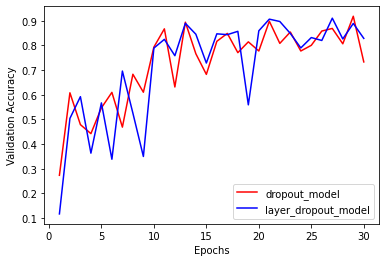

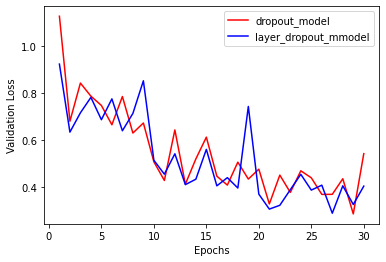

In [241]:
layer_model_dict = layer_model_hist.history

layer_model_val_acc = layer_model_dict['val_accuracy']
layer_model_val_loss = layer_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, dpt_model_val_acc, 'r', label='dropout_model')
plt.plot(epochs, layer_model_val_acc, 'b', label='layer_dropout_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, dpt_model_val_loss, 'r', label='dropout_model')
plt.plot(epochs, layer_model_val_loss, 'b', label='layer_dropout_mmodel')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

In [237]:
# original model에 층 쌓아보기
layer_modeld = models.Sequential()
layer_modeld.add(Dense(128, input_dim = 84, activation='relu'))
layer_modeld.add(Dense(128, activation='relu'))
layer_modeld.add(Dense(128, activation='relu'))
layer_modeld.add(Dense(1, activation='sigmoid'))

layer_modeld.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [238]:
layer_modeld_hist = layer_modeld.fit(X_train_over,y_train_over,epochs=30,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 1.2368 - accuracy: 0.5298 - val_loss: 0.3350 - val_accuracy: 0.9197
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7371 - accuracy: 0.5625 - val_loss: 0.4006 - val_accuracy: 0.8821
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5968 - val_loss: 1.1293 - val_accuracy: 0.3094
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6210 - val_loss: 1.3722 - val_accuracy: 0.0870
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6451 - val_loss: 0.5127 - val_accuracy: 0.8405
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.6850 - val_loss: 1.1038 - val_accuracy: 0.2442
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6760 - val_loss: 0.5318 - val_accuracy: 0.7339
Epoch 8/30
16/16 [==

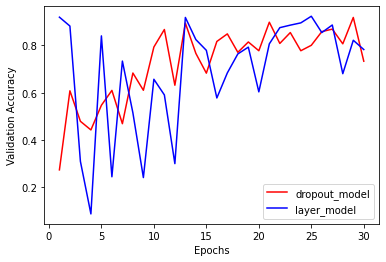

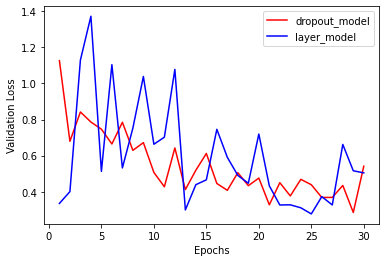

In [240]:
layer_modeld_dict = layer_modeld_hist.history

layer_modeld_val_acc = layer_modeld_dict['val_accuracy']
layer_modeld_val_loss = layer_modeld_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, dpt_model_val_acc, 'r', label='dropout_model')
plt.plot(epochs, layer_modeld_val_acc, 'b', label='layer_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, dpt_model_val_loss, 'r', label='dropout_model')
plt.plot(epochs, layer_modeld_val_loss, 'b', label='layer_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

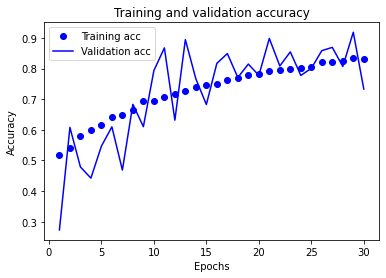

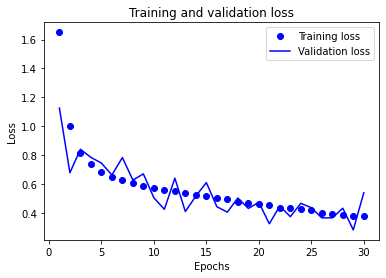

In [243]:
plt.clf()   # 그래프를 초기화합니다

acc = dpt_model_hist.history['accuracy']
val_acc = dpt_model_hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

loss = dpt_model_hist.history['loss']
val_loss = dpt_model_hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [277]:
more_model = models.Sequential()
more_model.add(Dense(128, activation='relu', input_dim=84))
more_model.add(Dropout(0.5))
more_model.add(Dense(128, activation='relu'))
more_model.add(Dropout(0.2))
more_model.add(Dense(1, activation='sigmoid'))

more_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [278]:
more_hist = more_model.fit(X_train_over,y_train_over,epochs=80,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/80
16/16 [==============================] - 0s 11ms/step - loss: 1.8066 - accuracy: 0.5078 - val_loss: 0.9665 - val_accuracy: 0.2605
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 1.0813 - accuracy: 0.5260 - val_loss: 0.6101 - val_accuracy: 0.6086
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 0.8760 - accuracy: 0.5485 - val_loss: 0.7185 - val_accuracy: 0.6654
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.7660 - accuracy: 0.5815 - val_loss: 0.7351 - val_accuracy: 0.4986
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.5951 - val_loss: 0.7475 - val_accuracy: 0.4806
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6170 - val_loss: 0.6502 - val_accuracy: 0.6255
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.6427 - val_loss: 0.6553 - val_accuracy: 0.5963
Epoch 8/80
16/16 [=

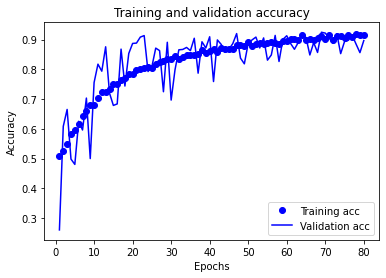

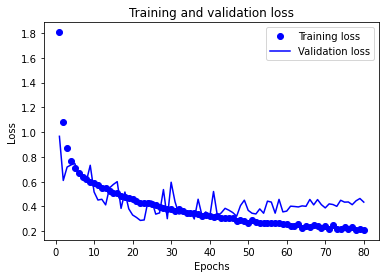

In [279]:
more_acc = more_hist.history['accuracy']
more_val_acc = more_hist.history['val_accuracy']

epochs = range(1, len(more_acc) + 1)

plt.plot(epochs, more_acc, 'bo', label='Training acc')
plt.plot(epochs, more_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

more_loss = more_hist.history['loss']
more_val_loss = more_hist.history['val_loss']

plt.plot(epochs, more_loss, 'bo', label='Training loss')
plt.plot(epochs, more_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

loss 보면 과적합 난 것을 알 수 있음

### 모델 최적화

#### L2 규제

In [259]:
from tensorflow.keras import regularizers

In [286]:
l2_model = models.Sequential()
l2_model.add(Dense(128, input_dim = 84, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
l2_model.add(Dropout(0.5))
l2_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
l2_model.add(Dropout(0.2))
l2_model.add(Dense(1, activation='sigmoid'))

l2_model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [287]:
l2_hist = l2_model.fit(X_train_over,y_train_over,epochs=80,batch_size=512,validation_data=(X_test, y_test)) #, class_weight=class_weight)#, callbacks=[es, w_mc])

Epoch 1/80
16/16 [==============================] - 0s 11ms/step - loss: 1.6641 - accuracy: 0.5164 - val_loss: 0.8880 - val_accuracy: 0.5093
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 1.0104 - accuracy: 0.5372 - val_loss: 0.6422 - val_accuracy: 0.6642
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 0.8581 - accuracy: 0.5458 - val_loss: 0.6904 - val_accuracy: 0.6867
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.7554 - accuracy: 0.5816 - val_loss: 0.7665 - val_accuracy: 0.5598
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.7074 - accuracy: 0.6047 - val_loss: 0.7115 - val_accuracy: 0.5929
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.6255 - val_loss: 0.7051 - val_accuracy: 0.5205
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.6460 - val_loss: 0.7699 - val_accuracy: 0.4795
Epoch 8/80
16/16 [=

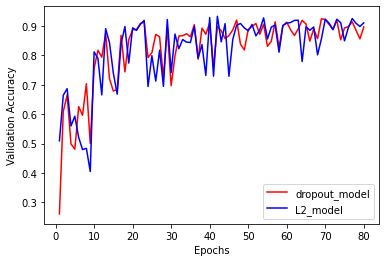

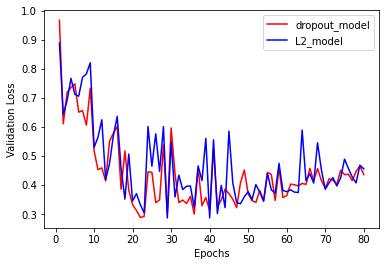

In [288]:
l2_dict = l2_hist.history

l2_val_acc = l2_dict['val_accuracy']
l2_val_loss = l2_dict['val_loss']

epochs = range(1, len(l2_val_loss) + 1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, more_val_acc, 'r', label='dropout_model')
plt.plot(epochs, l2_val_acc, 'b', label='L2_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, more_val_loss, 'r', label='dropout_model')
plt.plot(epochs, l2_val_loss, 'b', label='L2_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### L1 규제

In [289]:
l1_model = models.Sequential()
l1_model.add(Dense(128, input_dim = 84, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
l1_model.add(Dropout(0.5))
l1_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
l1_model.add(Dropout(0.2))
l1_model.add(Dense(1, activation='sigmoid'))

l1_model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [290]:
l1_hist = l1_model.fit(X_train_over, y_train_over,
                             epochs=80,
                             batch_size=512,
                             validation_data=(X_test, y_test))

Epoch 1/80
16/16 [==============================] - 0s 12ms/step - loss: 1.8523 - accuracy: 0.5211 - val_loss: 0.7442 - val_accuracy: 0.7810
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 1.2318 - accuracy: 0.5312 - val_loss: 0.7471 - val_accuracy: 0.7558
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 1.0391 - accuracy: 0.5665 - val_loss: 0.8451 - val_accuracy: 0.7103
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.9643 - accuracy: 0.5824 - val_loss: 0.7879 - val_accuracy: 0.7872
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 0.8977 - accuracy: 0.5985 - val_loss: 0.8542 - val_accuracy: 0.6480
Epoch 6/80
16/16 [==============================] - 0s 5ms/step - loss: 0.8574 - accuracy: 0.6225 - val_loss: 0.8094 - val_accuracy: 0.6412
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.8266 - accuracy: 0.6239 - val_loss: 0.8315 - val_accuracy: 0.6221
Epoch 8/80
16/16 [=

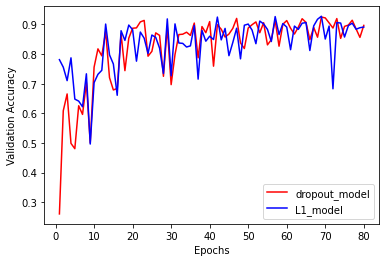

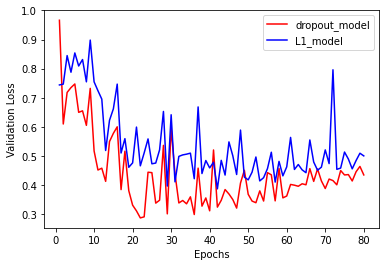

In [291]:
l1_dict = l1_hist.history

l1_val_acc = l1_dict['val_accuracy']
l1_val_loss = l1_dict['val_loss']

epochs = range(1, len(l1_val_loss) + 1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, more_val_acc, 'r', label='dropout_model')
plt.plot(epochs, l1_val_acc, 'b', label='L1_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, more_val_loss, 'r', label='dropout_model')
plt.plot(epochs, l1_val_loss, 'b', label='L1_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### L1_L2 규제

In [294]:
l1_l2_model = models.Sequential()
l1_l2_model.add(Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001),
                          activation='relu', input_dim=84))
l1_l2_model.add(Dropout(0.5))
l1_l2_model.add(Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001),
                          activation='relu'))
l1_l2_model.add(Dropout(0.2))
l1_l2_model.add(Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [297]:
l1_l2_hist = l1_l2_model.fit(X_train_over, y_train_over,
                             epochs=80,
                             batch_size=512,
                             validation_data=(X_test, y_test))

Epoch 1/80
16/16 [==============================] - 0s 12ms/step - loss: 2.1632 - accuracy: 0.5159 - val_loss: 1.0457 - val_accuracy: 0.6996
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 1.4555 - accuracy: 0.5391 - val_loss: 0.7853 - val_accuracy: 0.9152
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 1.2563 - accuracy: 0.5647 - val_loss: 1.0692 - val_accuracy: 0.6547
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 1.1370 - accuracy: 0.5848 - val_loss: 0.9830 - val_accuracy: 0.7310
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 1.0616 - accuracy: 0.6138 - val_loss: 1.0592 - val_accuracy: 0.6755
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 1.0230 - accuracy: 0.6216 - val_loss: 1.0058 - val_accuracy: 0.6103
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.9698 - accuracy: 0.6500 - val_loss: 0.9670 - val_accuracy: 0.6305
Epoch 8/80
16/16 [=

Epoch 59/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4540 - accuracy: 0.8638 - val_loss: 0.4964 - val_accuracy: 0.8518
Epoch 60/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.8528 - val_loss: 0.4670 - val_accuracy: 0.8669
Epoch 61/80
16/16 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.8538 - val_loss: 0.5174 - val_accuracy: 0.8327
Epoch 62/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.8634 - val_loss: 0.4466 - val_accuracy: 0.8832
Epoch 63/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.8533 - val_loss: 0.4322 - val_accuracy: 0.8838
Epoch 64/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8681 - val_loss: 0.4191 - val_accuracy: 0.9074
Epoch 65/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.8481 - val_loss: 0.4477 - val_accuracy: 0.8815
Epoch 66/80
1

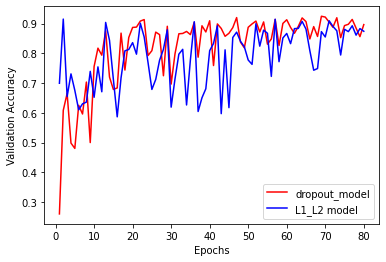

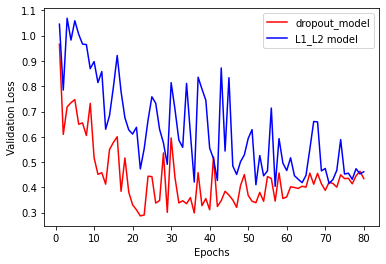

In [298]:
l1_l2_model_dict = l1_l2_hist.history

l1_l2_model_val_acc = l1_l2_model_dict['val_accuracy']
l1_l2_model_val_loss = l1_l2_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, more_val_acc, 'r', label='dropout_model')
plt.plot(epochs, l1_l2_model_val_acc, 'b', label='L1_L2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, more_val_loss, 'r', label='dropout_model')
plt.plot(epochs, l1_l2_model_val_loss, 'b', label='L1_L2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### 최종 모델에 earlyStopping 적용

In [52]:
final_model = models.Sequential()
final_model.add(Dense(128, activation='relu', input_dim=84))
final_model.add(Dropout(0.5))
final_model.add(Dense(128, activation='relu'))
final_model.add(Dropout(0.2))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [53]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
mc = ModelCheckpoint(filepath=modelpath, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [54]:
final_model_hist = final_model.fit(X_train_over,y_train_over,
                                   epochs=80,batch_size=512,validation_data=(X_test, y_test),
                                   callbacks=[es,mc])

Epoch 1/80
 1/16 [>.............................] - ETA: 0s - loss: 2.4187 - accuracy: 0.5156
Epoch 00001: val_loss improved from inf to 1.00038, saving model to ./model\01-1.0004.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 1.8884 - accuracy: 0.5108 - val_loss: 1.0004 - val_accuracy: 0.2156
Epoch 2/80
 1/16 [>.............................] - ETA: 0s - loss: 1.0720 - accuracy: 0.5703
Epoch 00002: val_loss improved from 1.00038 to 0.54410, saving model to ./model\02-0.5441.hdf5
16/16 [==============================] - 0s 4ms/step - loss: 1.0786 - accuracy: 0.5372 - val_loss: 0.5441 - val_accuracy: 0.7810
Epoch 3/80
 1/16 [>.............................] - ETA: 0s - loss: 0.9411 - accuracy: 0.5527
Epoch 00003: val_loss did not improve from 0.54410
16/16 [==============================] - 0s 4ms/step - loss: 0.8457 - accuracy: 0.5680 - val_loss: 0.6754 - val_accuracy: 0.6496
Epoch 4/80
 1/16 [>.............................] - ETA: 0s - loss: 0.8041 - accuracy: 0.5488

Epoch 30/80
 1/16 [>.............................] - ETA: 0s - loss: 0.4293 - accuracy: 0.7754
Epoch 00030: val_loss did not improve from 0.28694
16/16 [==============================] - 0s 4ms/step - loss: 0.3877 - accuracy: 0.8256 - val_loss: 0.5313 - val_accuracy: 0.7204
Epoch 31/80
 1/16 [>.............................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8145
Epoch 00031: val_loss did not improve from 0.28694
16/16 [==============================] - 0s 4ms/step - loss: 0.3742 - accuracy: 0.8382 - val_loss: 0.5867 - val_accuracy: 0.6873
Epoch 32/80
 1/16 [>.............................] - ETA: 0s - loss: 0.4506 - accuracy: 0.7734
Epoch 00032: val_loss did not improve from 0.28694
16/16 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8330 - val_loss: 0.4628 - val_accuracy: 0.7737
Epoch 00032: early stopping


In [354]:
final_model.save('./model/29-0.2701.hdf5')

In [38]:
new_model=tf.keras.models.load_model('./model/29-0.2701.hdf5')

In [ ]:
final_model.save('./model\22-0.2869.hdf5')

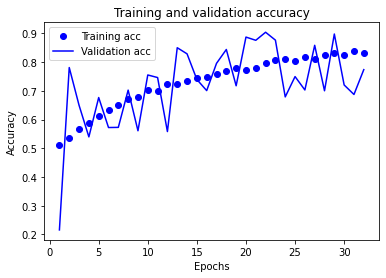

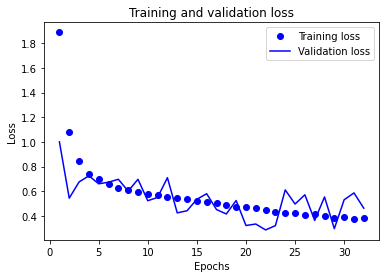

In [55]:
final_acc = final_model_hist.history['accuracy']
final_val_acc = final_model_hist.history['val_accuracy']

epochs = range(1, len(final_acc) + 1)

plt.plot(epochs, final_acc, 'bo', label='Training acc')
plt.plot(epochs, final_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

final_loss = final_model_hist.history['loss']
final_val_loss = final_model_hist.history['val_loss']

plt.plot(epochs, final_loss, 'bo', label='Training loss')
plt.plot(epochs, final_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 성능평가

In [56]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

predict = final_model.predict_classes(X_test)

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      1684
         1.0       0.12      0.59      0.20        97

    accuracy                           0.75      1781
   macro avg       0.55      0.67      0.53      1781
weighted avg       0.92      0.75      0.81      1781



In [58]:
import matplotlib as mpl
from sklearn import metrics

0.6717835541298334


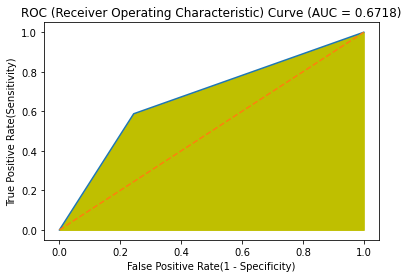

In [59]:
# ROC 그리기
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict) #곡선 그리기

plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='y')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

score = metrics.auc(fpr, tpr) #면적 구하기
print(score) #1.0

plt.title('ROC (Receiver Operating Characteristic) Curve (AUC = {})'.format(round(score,4)))
plt.show()